# If you happy and I know it you can enter my House

### You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem. Where, we allow a person to enter the house only if he/she is smiling! So, a smile detector!



Details of the "Happy" dataset:

Images are of shape (64,64,3)
Training: 600 pictures
Test: 150 pictures

# Load Dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


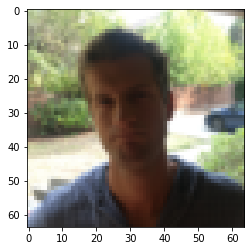

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=(64,64,3)),
        layers.Conv2D(32, kernel_size=(7,7), activation="relu",padding='same'),
        keras.layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        
        layers.Dense(1, activation="sigmoid"),
  
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 37,633
Trainable params: 37,569
Non-traina

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [57]:
history_model = model.fit(X_train, Y_train, batch_size=1, epochs=5)

Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 1.1514 - accuracy: 0.7783
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.3876 - accuracy: 0.8867
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.2054 - accuracy: 0.9267
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.2567 - accuracy: 0.9200
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1410 - accuracy: 0.9450


# Evaluate Model

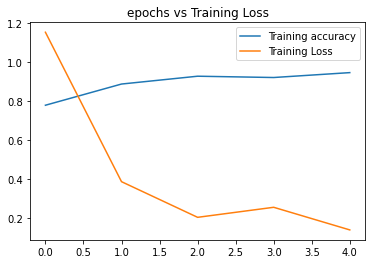

In [58]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [59]:
score=model.evaluate(X_test,Y_test,verbose=0)
print('Test accuracy:',score[1])

Test accuracy: 0.95333331823349


print(history_model.history.values())

In [60]:
print(model.evaluate)

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x000002212C9C5040>>


# Confusion Matrix

In [61]:
import matplotlib.pyplot as plt
from sklearn import metrics



predicted1=model.predict(X_test)



5/5 [==============================] - 0s 48ms/step


In [62]:
X_test

array([[[[0.8745098 , 0.81176471, 0.62352941],
         [0.85098039, 0.81568627, 0.61176471],
         [0.87058824, 0.85098039, 0.6627451 ],
         ...,
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686]],

        [[0.85490196, 0.8       , 0.60392157],
         [0.84313725, 0.79215686, 0.64705882],
         [0.85490196, 0.82352941, 0.6745098 ],
         ...,
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686]],

        [[0.79215686, 0.74117647, 0.57254902],
         [0.81176471, 0.76078431, 0.59607843],
         [0.88627451, 0.85490196, 0.7372549 ],
         ...,
         [0.99607843, 1.        , 0.98431373],
         [0.99215686, 0.99607843, 0.97647059],
         [1.        , 1.        , 0.99215686]],

        ...,

        [[0.89019608, 0.90196078, 0.76862745],
         [0.97254902, 0.97647059, 0.91372549]

In [63]:
predicted1

array([[9.9968302e-01],
       [9.9573237e-01],
       [9.9999440e-01],
       [9.9697584e-01],
       [8.3660537e-01],
       [9.9743068e-01],
       [9.9301714e-01],
       [1.4962350e-02],
       [9.9171376e-01],
       [1.2238848e-02],
       [9.9724394e-01],
       [3.1783810e-01],
       [9.8992157e-01],
       [9.0947628e-01],
       [7.0654005e-02],
       [9.8234630e-01],
       [5.2386709e-04],
       [9.9943084e-01],
       [5.6611677e-04],
       [9.9995762e-01],
       [9.9907589e-01],
       [9.8089379e-01],
       [4.9531275e-01],
       [9.9999839e-01],
       [2.8121675e-04],
       [3.8433663e-04],
       [9.8086268e-01],
       [2.0229004e-03],
       [5.9217644e-01],
       [9.9966550e-01],
       [9.9986857e-01],
       [9.9997956e-01],
       [9.9472243e-01],
       [9.9823636e-01],
       [9.9967653e-01],
       [9.9851787e-01],
       [2.5644397e-02],
       [2.3643898e-02],
       [2.7446689e-02],
       [1.6975511e-03],
       [9.7064626e-01],
       [2.233131

In [64]:
L=[]
for i in predicted1:
    if i > 0.5:
        i=1
        L.append(i)
    else:
        i=0
        L.append(i)
    i=+1    
        
L 
from array import array
j=array("i",L)
j

array('i', [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [65]:
pred = np.array(L).reshape(-1,1)
print(pred.shape)
print(Y_test.shape)

(150, 1)
(150, 1)


In [66]:
type(X_test)


numpy.ndarray

In [67]:

confusion_matrix1 = metrics.confusion_matrix(Y_test,pred)



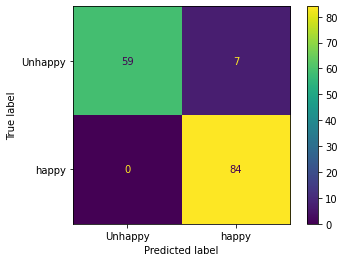

In [68]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix1, display_labels = ['Unhappy', 'happy'])

cm_display.plot()
plt.show()